In [13]:
# Package import cell, data file read-in
# and conversion to all floats

import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import scipy as sp
from io import StringIO

bt = pd.read_csv('tornadoes-binary.csv', index_col='EVENT_ID')
rt = pd.read_csv('tornadoes-nonbinary.csv', index_col='EVENT_ID')

bt = bt.astype(float)
rt = rt.astype(float)

Binary Casualties Class Distribution:

0:  0.923050638966719
1:  0.07694936103328094

Maximum Number of Casualties: 

1311.0


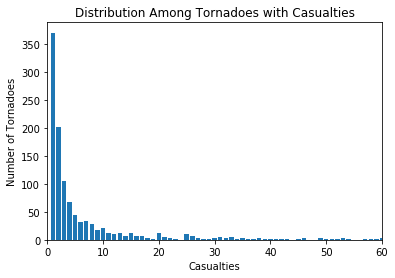

In [34]:
# Quick view of percentage-wise class breakdown of tornadoes
# Quick graph view of casualties volume among all tornadoes 
# with at least one casualty

bt_counts = bt['binary_casualties'].value_counts().sort_index()
bt_zeros = bt_counts[0]/(bt_counts[0]+bt_counts[1])
bt_ones = bt_counts[1]/(bt_counts[0]+bt_counts[1])

print('Binary Casualties Class Distribution:\n\n0:  '+str(bt_zeros)+'\n1:  '+str(bt_ones))

rt_counts = rt['casualties'].value_counts().sort_index()
rt_counts_without_zero = rt_counts.drop(0)

print('\nMaximum Number of Casualties: \n\n'+str(list(rt_counts.index)[-1]))

plt.bar(rt_counts_without_zero.index, rt_counts_without_zero)
plt.title('Distribution Among Tornadoes with Casualties')
plt.ylabel('Number of Tornadoes')
plt.xlabel('Casualties')
plt.xlim(0,60)
plt.show()

In [6]:
# Data scaling and splitting into features and target

ybt = bt['binary_casualties']
yt = rt['casualties']

Xt = preprocessing.scale(rt.drop(columns=['casualties']))
Xbt = preprocessing.scale(bt.drop(columns=['binary_casualties']))

In [7]:
# Preliminary 50:50 train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xbt, ybt, test_size=0.5)

In [8]:
# Simple Logistic Regression

lr = LogisticRegression().fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_prob = lr.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(y_test, lr_pred_prob)
lr_auc = metrics.auc(lr_fpr, lr_tpr)

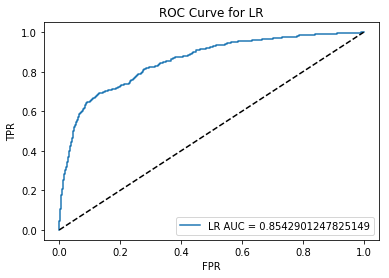

In [9]:
# ROC curve and AUC for simple Logistic Regression

plt.plot(lr_fpr, lr_tpr, label='LR AUC = '+str(lr_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for LR')
plt.legend()
plt.show()